In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()

In [399]:
simbolo='AAPL'
nome='APPLE'
inizio=date(2019,6,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)

[*********************100%***********************]  1 of 1 completed


In [400]:
df=pd.DataFrame(data)
ritorno_giornaliero = df['Close'].pct_change().fillna(0.0)
ret_dat=pd.DataFrame(ritorno_giornaliero)
ret_dat.reset_index(level=0, inplace=True)
ret_dat['nday'] =ret_dat['Date'].dt.weekday_name.fillna(0.0)
ret_dat.head()

,Date,Close,nday
0,2019-05-31,0.000000,Friday
1,2019-06-03,-0.010110,Monday
2,2019-06-04,0.036584,Tuesday
3,2019-06-05,0.016143,Wednesday
4,2019-06-06,0.014682,Thursday


In [401]:
def ritorna_segnale (df,nday):
      segnale=0.0
      pos=len(df[(df['nday']==nday) & (df['Close']>0)])/len(df[df['nday']==nday])*100
      neg=len(df[(df['nday']==nday) & (df['Close']<0)])/len(df[df['nday']==nday])*100
      if pos>=neg:
        segnale=1.0
      else : segnale=0.0  
      return segnale

In [402]:
sig = []
for index,row in ret_dat.iterrows() :
    segnale=ritorna_segnale (ret_dat,row.nday)
    sig.append(segnale)
df['segnale']=sig 
df['posizione']=df['segnale'].diff().fillna(0.0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,segnale,posizione
Date,,,,,,,,
2020-02-05,323.519989,324.760010,318.950012,321.450012,320.688934,29706700,1.0,1.0
2020-02-06,322.570007,325.220001,320.260010,325.209991,324.440002,26356400,1.0,0.0
2020-02-07,322.369995,323.399994,318.000000,320.029999,320.029999,29421000,0.0,-1.0
2020-02-10,314.179993,321.549988,313.850006,321.549988,321.549988,27337200,1.0,1.0
2020-02-11,323.600006,323.899994,318.709991,319.609985,319.609985,23547100,0.0,-1.0


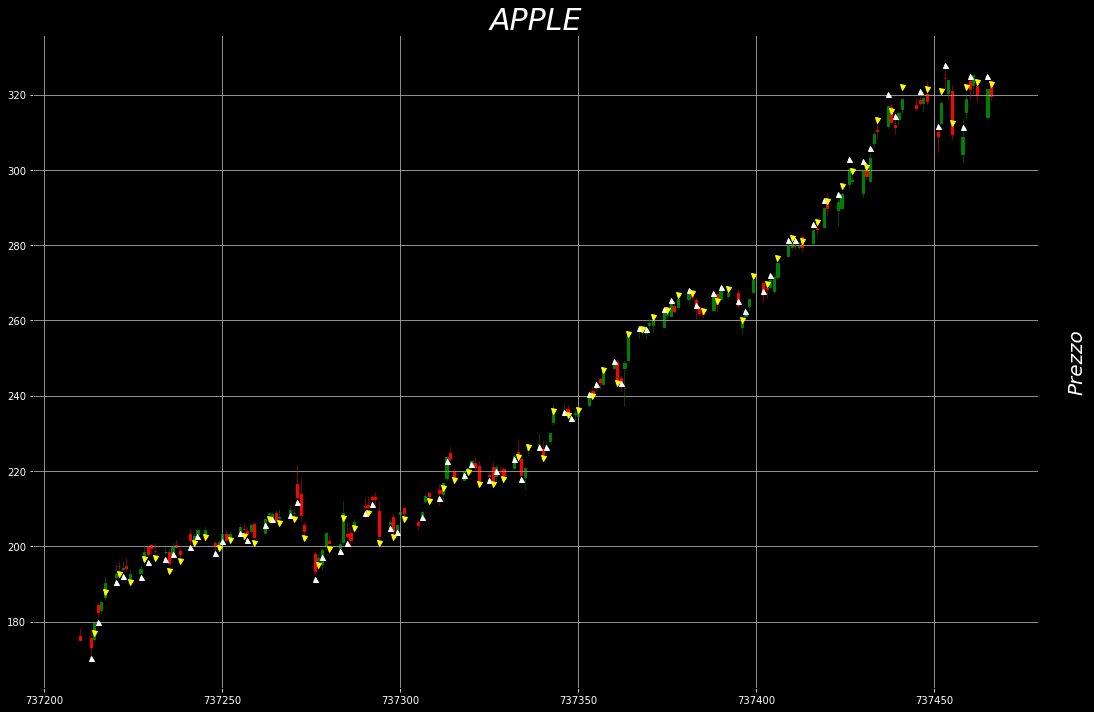

In [403]:
df.head()
df.reset_index(inplace=True)
df.head()
df['Date'] = df['Date'].map(mdates.date2num)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax2=ax1.twinx()
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
ax1.figure.set_facecolor('black')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
candlestick_ohlc(ax1, df.values, width=0.6, colorup='green', colordown='red', alpha=1)
ax1.grid()
ax2.plot(df.Date[df.posizione==1],df.loc[df.posizione==1].Close,'^',markersize=5,color='white')
ax2.plot(df.Date[df.posizione==-1],df.loc[df.posizione==-1].Close,'v',markersize=5,color='yellow')
plt.xlabel('Data',size=20, color='white',style='italic')
plt.ylabel('Prezzo',size=20, color='white',style='italic')
plt.show()

In [438]:
capitale_iniziale=10000
portfolio = pd.DataFrame(index=df.index).fillna(0.0)
portfolio['simbolo']=100*df['posizione']
portfolio.head()

,simbolo
0,0.0
1,100.0
2,-100.0
3,100.0
4,0.0


In [439]:
portfolio['res']=(posizione.multiply(df['Close'],axis=0))
portfolio.tail()

,simbolo,res
172,100.0,32145.001221
173,0.0,0.000000
174,-100.0,-32002.999878
175,100.0,32154.998779
176,-100.0,-31960.998535


In [440]:
differenza_posizione=posizione.diff()
portfolio['cash']=capitale_iniziale-(differenza_posizione.multiply(df['Close'],axis=0)).cumsum()
portfolio.tail()

,simbolo,res,cash
172,100.0,32145.001221,-25200.987244
173,0.0,0.000000,7320.011902
174,-100.0,-32002.999878,39323.011780
175,100.0,32154.998779,-24986.985779
176,-100.0,-31960.998535,38935.011292


In [441]:
portfolio['totale']=portfolio['cash']+portfolio['res']
portfolio.tail()

,simbolo,res,cash,totale
172,100.0,32145.001221,-25200.987244,6944.013977
173,0.0,0.000000,7320.011902,7320.011902
174,-100.0,-32002.999878,39323.011780,7320.011902
175,100.0,32154.998779,-24986.985779,7168.013000
176,-100.0,-31960.998535,38935.011292,6974.012756


In [442]:
portfolio['ritorno']=portfolio['totale'].pct_change()
portfolio.tail()

,simbolo,res,cash,totale,ritorno
172,100.0,32145.001221,-25200.987244,6944.013977,-0.036091
173,0.0,0.000000,7320.011902,7320.011902,0.054147
174,-100.0,-32002.999878,39323.011780,7320.011902,0.000000
175,100.0,32154.998779,-24986.985779,7168.013000,-0.020765
176,-100.0,-31960.998535,38935.011292,6974.012756,-0.027065


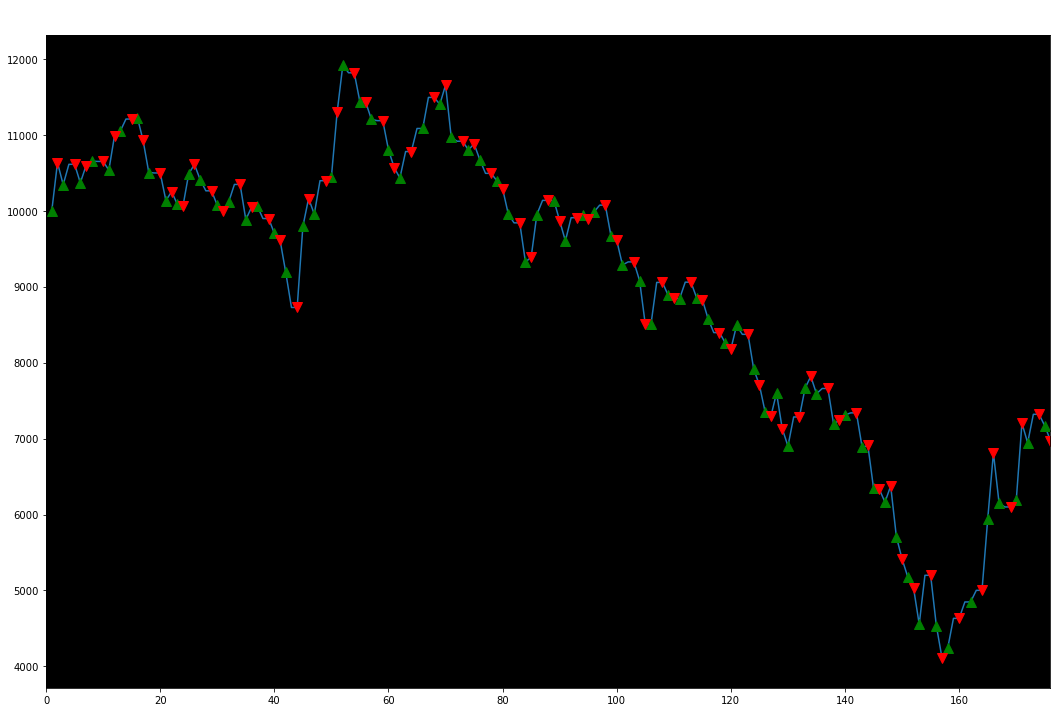

In [443]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
portfolio.totale.plot()
ax1.plot(portfolio.loc[df.posizione==1].index,portfolio.totale[df.posizione==1],'^',markersize=10,color='green')
ax1.plot(portfolio.loc[df.posizione==-1].index,portfolio.totale[df.posizione==-1],'v',markersize=10,color='red')
plt.show()